# Numerical Computing :: Project Eleven
### Julia Troni

- Implement the following numerical methods for approximating integrals:
    - (i) trapezoidal rule, 
    - (ii) Simpson’s rule, and 
    - (iii) Clenshaw-Curtis rule. (Code for generating the points and weights of the Clenshaw-Curtis rule is available on Canvas.)
    
- Using calculus, compute the definite integral of f(x) = cos(3πx) on the interval [−1, 1]. 
- Run a convergence study on the three numerical methods and identify the asymptotic regime and the rate of convergence for each method. 
- FOR FUN: Change the integration interval to [−π, π] and repeat the study. What changes?


In [6]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math

### Using calculus, compute the definite integral of f(x) = cos(3πx) on the interval [−1, 1] : 

$f(x) =cos(3\pi x) $ on the interval [−1, 1]

According to symbolab.com, the integral of $\text{cos}(3x)$ is
$\frac{1}{3}\cdot\text{sin}(3x)+ C$. 

So, evaluated from [-1,1] 
$\frac{1}{3 \pi}{sin}(3 \pi x) |_{-1}^{1} = \frac{1}{3 \pi}\text{sin}(3 \pi) - (\frac{1}{3 \pi}\text{sin}(-3 \pi)) = 0$


In [7]:
#Define original function to integrate
def myFun(x):
    return np.cos(3*np.pi*x)

## Trapezoidal Rule

In [8]:

#function is the function to integrate
#n is num points 
#a is low bound
#b is high bound
def trapezoid (function, a, b, n):
    x = np.linspace(a, b, n+1)
    f=function(x)
    h = (b - a) / (n)
    I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
    return I_trap

## Simpsons Rule

In [9]:

#function is the function to integrate
#n is num points 
#a is low bound
#b is high bound
def simpson (function, a, b, n):
    if n % 2 == 1:
        n-=1
    x = np.linspace(a, b, n+1)
    f=function(x)
    h = (b - a) / (n - 1)
    I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
    return I_simp

## Clenshaw-Curtis

In [10]:
# %load clenshaw_curtis_rule.py
#! /usr/bin/env python
#
def clenshaw_curtis_compute ( n ):

#*****************************************************************************80
#
## CLENSHAW_CURTIS_COMPUTE computes a Clenshaw Curtis quadrature rule.
#
#  Discussion:
#
#    This method uses a direct approach.  The paper by Waldvogel
#    exhibits a more efficient approach using Fourier transforms.
#
#    The integral:
#
#      integral ( -1 <= x <= 1 ) f(x) dx
#
#    The quadrature rule:
#
#      sum ( 1 <= i <= n ) w(i) * f ( x(i) )
#
#    The abscissas for the rule of order N can be regarded
#    as the cosines of equally spaced angles between 180 and 0 degrees:
#
#      X(I) = cos ( ( N - I ) * PI / ( N - 1 ) )
#
#    except for the basic case N = 1, when
#
#      X(1) = 0.
#
#    A Clenshaw-Curtis rule that uses N points will integrate
#    exactly all polynomials of degrees 0 through N-1.  If N
#    is odd, then by symmetry the polynomial of degree N will
#    also be integrated exactly.
#
#    If the value of N is increased in a sensible way, then
#    the new set of abscissas will include the old ones.  One such
#    sequence would be N(K) = 2*K+1 for K = 0, 1, 2, ...
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    02 April 2015
#
#  Author:
#
#    John Burkardt
#
#  Reference:
#
#    Charles Clenshaw, Alan Curtis,
#    A Method for Numerical Integration on an Automatic Computer,
#    Numerische Mathematik,
#    Volume 2, Number 1, December 1960, pages 197-205.
#
#    Philip Davis, Philip Rabinowitz,
#    Methods of Numerical Integration,
#    Second Edition,
#    Dover, 2007,
#    ISBN: 0486453391,
#    LC: QA299.3.D28.
#
#    Joerg Waldvogel,
#    Fast Construction of the Fejer and Clenshaw-Curtis Quadrature Rules,
#    BIT Numerical Mathematics,
#    Volume 43, Number 1, 2003, pages 1-18.
#
#  Parameters:
#
#    Input, integer N, the order.
#
#    Output, real X(N), the abscissas.
#
#    Output, real W(N), the weights.
#
  import numpy as np

  if ( n == 1 ):

    x = np.zeros ( n )
    w = np.zeros ( n )

    w[0] = 2.0

  else:

    theta = np.zeros ( n )

    for i in range ( 0, n ):
      theta[i] = float ( n - 1 - i ) * np.pi / float ( n - 1 )

    x = np.cos ( theta )
    w = np.zeros ( n )

    for i in range ( 0, n ):

      w[i] = 1.0

      jhi = ( ( n - 1 ) // 2 )

      for j in range ( 0, jhi ):

        if ( 2 * ( j + 1 ) == ( n - 1 ) ):
          b = 1.0
        else:
          b = 2.0

        w[i] = w[i] - b * np.cos ( 2.0 * float ( j + 1 ) * theta[i] ) \
             / float ( 4 * j * ( j + 2 ) + 3 )

    w[0] = w[0] / float ( n - 1 )
    for i in range ( 1, n - 1 ):
      w[i] = 2.0 * w[i] / float ( n - 1 )
    w[n-1] = w[n-1] / float ( n - 1 )

  return x, w

def clenshaw_curtis_compute_test ( ):

#*****************************************************************************80
#
## CLENSHAW_CURTIS_COMPUTE_TEST tests CLENSHAW_CURTIS_COMPUTE
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    02 April 2015
#
#  Author:
#
#    John Burkardt
#
  import platform

  print ( '' )
  print ( 'CLENSHAW_CURTIS_COMPUTE_TEST' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  CLENSHAW_CURTIS_COMPUTE computes' )
  print ( '  a Clenshaw-Curtis quadrature rule over [-1,1].' )
  print ( '' )
  print ( '     Index       X                       W' )

  for n in range ( 1, 11 ):

    [ x, w ] = clenshaw_curtis_compute ( n )

    print ( '' )

    for i in range ( 0, n ):
      print ( '  %2d  %24.16g  %24.16g' % ( i, x[i], w[i] ) )
#
#  Terminate.
#
  print ( '' )
  print ( 'CLENSHAW_CURTIS_COMPUTE_TEST:' )
  print ( '  Normal end of execution.' )
  return

if ( __name__ == '__main__' ):
    from timestamp import timestamp
    timestamp()
    clenshaw_curtis_compute_test ( )
    timestamp ( )


ModuleNotFoundError: No module named 'timestamp'

In [11]:
%run clenshaw_curtis_rule.py

ModuleNotFoundError: No module named 'timestamp'

Well I tried pip install timestamp and still not working so um I don't really know what to do with that but I will continue without poor clenshaw :(....

In [12]:
def convergenceTest(f, a, b, truth, k=20):
    ns = []

    trap_results=[]
    simp_results=[]
    
    trap_error=[]
    simp_error=[]

    for i in range(1, k+1):
        n = (2** i) + 1
        ns.append(n)
        
        print("Number of points: {}".format(n))

        trap_results.append(trapezoid(f, a, b, n))
        simp_results.append(simpson(f, a, b, n))
        
        trap_error.append(abs(trap_results[i-1] - truth))
        simp_error.append(abs(simp_results[i-1] - truth))
        
    plt.figure(figsize = (10, 4))
    plt.loglog(ns, trap_error, '-*', label='$trap$')
    plt.loglog(ns, simp_error, '-x', label='$simp$')
    plt.xlabel("n", fontsize='xx-large')
    plt.ylabel("error", fontsize='xx-large')
    plt.title("", fontsize='xx-large')
    plt.grid()
    plt.legend()
    plt.show()

Number of points: 3
Number of points: 5
Number of points: 9
Number of points: 17
Number of points: 33
Number of points: 65
Number of points: 129
Number of points: 257
Number of points: 513
Number of points: 1025
Number of points: 2049
Number of points: 4097
Number of points: 8193
Number of points: 16385
Number of points: 32769


<IPython.core.display.Javascript object>


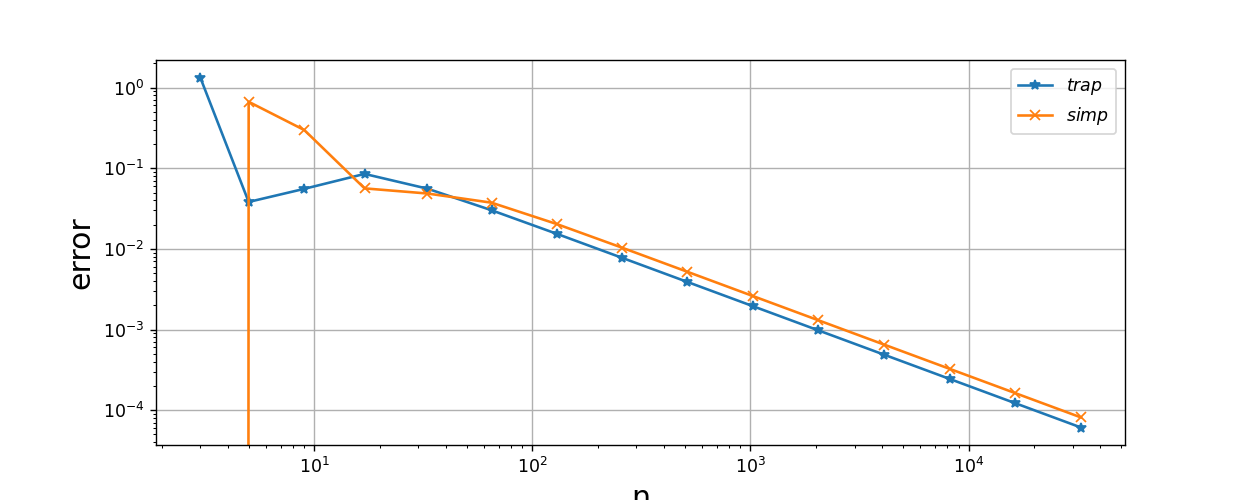

In [13]:
convergenceTest(myFun, -1, 1, 0, 15)

So initially it appears that Simpson correctly calculates the integral and the error is 0, but then converges slightly slower than the trapezoidal rule. This confuses me and seems to contradict what I read and learned from lectures

Number of points: 3
Number of points: 5
Number of points: 9
Number of points: 17
Number of points: 33
Number of points: 65
Number of points: 129
Number of points: 257
Number of points: 513
Number of points: 1025
Number of points: 2049
Number of points: 4097
Number of points: 8193
Number of points: 16385
Number of points: 32769


<IPython.core.display.Javascript object>


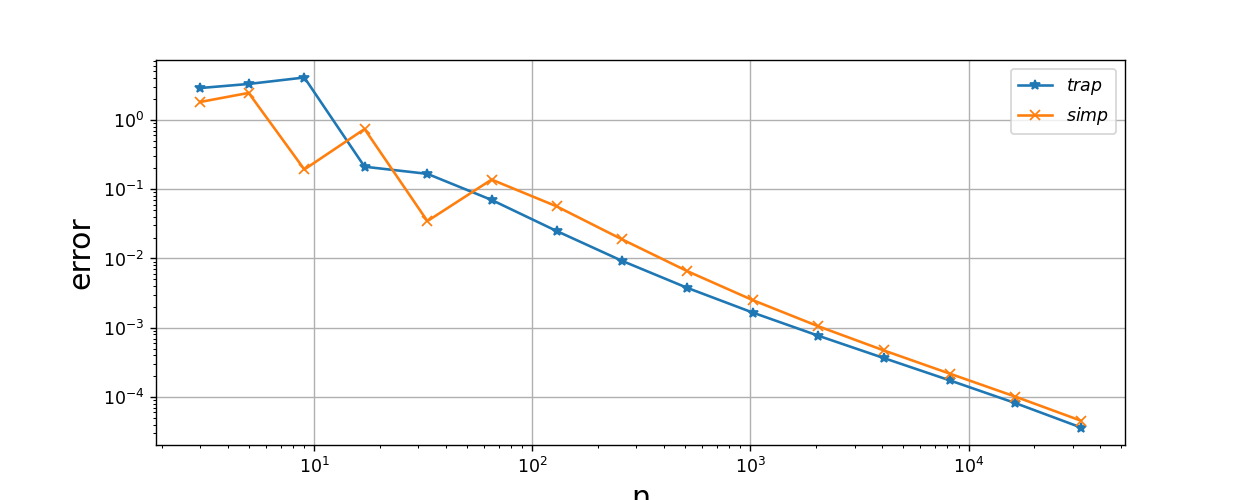

In [14]:
 #note I used symlab to calculate the integral over -pi to pi which is approx -0.20630
convergenceTest(myFun, -np.pi, np.pi, -0.20630, 15)

Again this convergence representation does not appear second of 3rd order to me, which confuses me from lecture and research I did. From those I learned lots of fun facts:

- Trapezoid Rule is $O(h^3)$ for a single subinterval and $O(h^2)$ over the whole interval.So the error of trapezoidal rule converges to $O(n^{-2})$ or 2nd order


- Simpson’s Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval.So Simpson’s Rule gains another two orders of accuracy over trapezoidal and the error converges to $O(n^{-4})$ or 4th order



- Lastly Clenshaw, which didn't get a chance to have fun in my NB :(,  converges very very fast for smooth functions (meaning all derivs exist) to $O(p^{-n})$
- BUt if not all derivatives exist and the functions is not smooth the error only converges to $O(n^{-k+1})$ for k derivs

- Lastly lastly, Paul is a  quality chef 

## References


- https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html

- https://www.symbolab.com/solver/step-by-step/%5Cint_%7B-1%7D%5E%7B1%7D%20%5Ccos%5Cleft(3%5Cpi%20x%5Cright)dx%5E%7B%20%7D%20?or=input 


* Also thank you for making enjoyable lectures and putting a smile on my face! Your "Cooking and Computing" segment was the highlight of my (sad loner) Thanksgiving ;)
* Second also, I love Daves killer bread! 10/10 recommend peanut butter + banana, toasted of course and cut in trapezoids make it taste 100x better